In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../dataset/NoThemeTweets.csv')
df.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)


In [18]:
df = df[["tweet_text", "sentiment"]].rename(columns={"tweet_text": "text", "sentiment": "label"})
df.head()

,text,label
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo


## Create a histogram of the data

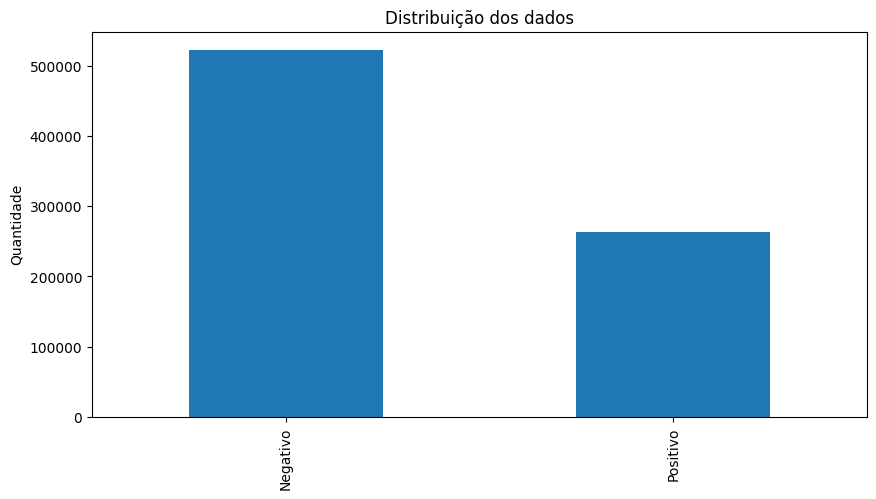

In [4]:
counts = df["label"].value_counts()
total = len(df["label"])
proportions = counts / total
value_counts = df["label"].value_counts()
plt.figure(figsize=(10,5))
value_counts.plot(kind='bar')

# for i, v in enumerate(value_counts):
#     plt.text(i, v + 10, str(round(v/value_counts.sum() * 100, 2)) + '%', ha='center')
plt.ylabel("Quantidade")
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=16)
plt.title("Distribuição dos dados")
plt.show()

In [5]:
plt.savefig("distribuicao_dados_classificacao.jpeg")

<Figure size 640x480 with 0 Axes>

## Removing a stop word

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("portuguese"))

def limpar_texto(texto):
    texto = texto.lower() # Converte para minúsculas
    texto = texto.strip() # Remove espaços extras
    tokens = word_tokenize(texto) # Quebra em tokens (palavras)
    tokens = [token for token in tokens if token.isalpha()] # Remove pontuação
    tokens = [token for token in tokens if token not in stop_words] # Remove stopwords
    # tokens = [token for token in tokens if (len(token) > 1 or token in ["s", "n", "c", "d", "k", "ñ", "p"])] # Verifica tamanho das palavras
    return " ".join(tokens)

df['text_nltk'] = df['text'].apply(limpar_texto)

[nltk_data] Downloading package punkt to /home/matheus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matheus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import spacy
!python3 -m spacy download pt_core_news_lg
nlp = spacy.load("pt_core_news_lg")

filtered_texts = []

for doc in nlp.pipe(df['text'], batch_size=500):
    doc = [token for token in doc if not token.is_stop]
    filtered_text = " ".join([token.text for token in doc])
    filtered_texts.append(filtered_text)
df['text_spacy'] = filtered_texts

2023-02-05 14:52:30.908088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 14:52:31.365758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 14:52:31.365789: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-05 14:52:33.298180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2023-02-05 14:52:36.455763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 14:52:36.735238: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 14:52:36.735261: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-05 14:52:37.947132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [22]:
df['text_spacy_nltk'] = df['text_spacy'].apply(limpar_texto)

In [24]:
df.head()

,text,label,text_nltk,text_spacy,text_spacy_nltk
0,@Tixaa23 14 para eu ir :),Positivo,ir,@Tixaa23 14 :),
1,@drexalvarez O meu like eu já dei na época :),Positivo,drexalvarez like dei época,@drexalvarez like dei época :),drexalvarez like dei época
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo,queria conseguir comer alguma coisa pra poder ...,queria conseguir comer alguma pra dormir :),queria conseguir comer alguma pra dormir
3,:D que lindo dia !,Positivo,d lindo dia,:D lindo dia !,d lindo dia
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo,pq pr jeito oferta ha q aproveitar p,"@Primo_Resmungao Pq pr jeito!!é "" oferta "" , h...",pq pr jeito oferta ha q aproveitar p


In [ ]:
df.to_csv("NoThemeTweets_clean.csv", index=False)

## Create a word cloud of the data

In [2]:
import pandas as pd

df = pd.read_csv("NoThemeTweets_clean.csv")
df.head()

,text,label,text_nltk,text_spacy,text_spacy_nltk
0,@Tixaa23 14 para eu ir :),Positivo,ir,@Tixaa23 14 :),NaN
1,@drexalvarez O meu like eu já dei na época :),Positivo,drexalvarez like dei época,@drexalvarez like dei época :),drexalvarez like dei época
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo,queria conseguir comer alguma coisa pra poder ...,queria conseguir comer alguma pra dormir :),queria conseguir comer alguma pra dormir
3,:D que lindo dia !,Positivo,d lindo dia,:D lindo dia !,d lindo dia
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo,pq pr jeito oferta ha q aproveitar p,"@Primo_Resmungao Pq pr jeito!!é "" oferta "" , h...",pq pr jeito oferta ha q aproveitar p


### Using the default text

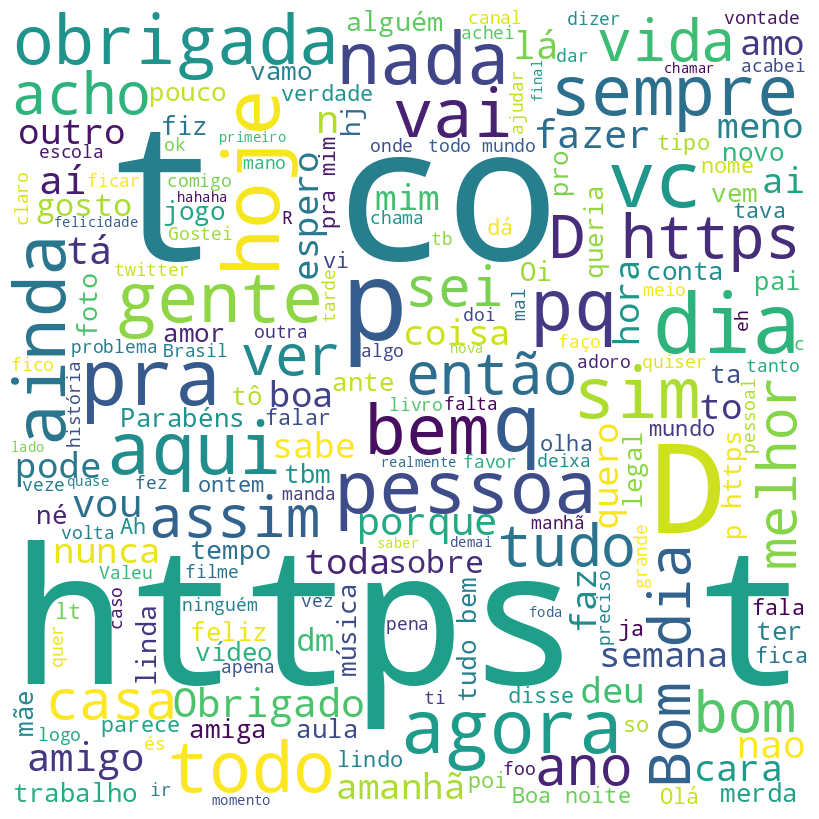

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
query = df.query("label == 'Positivo'")["text"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

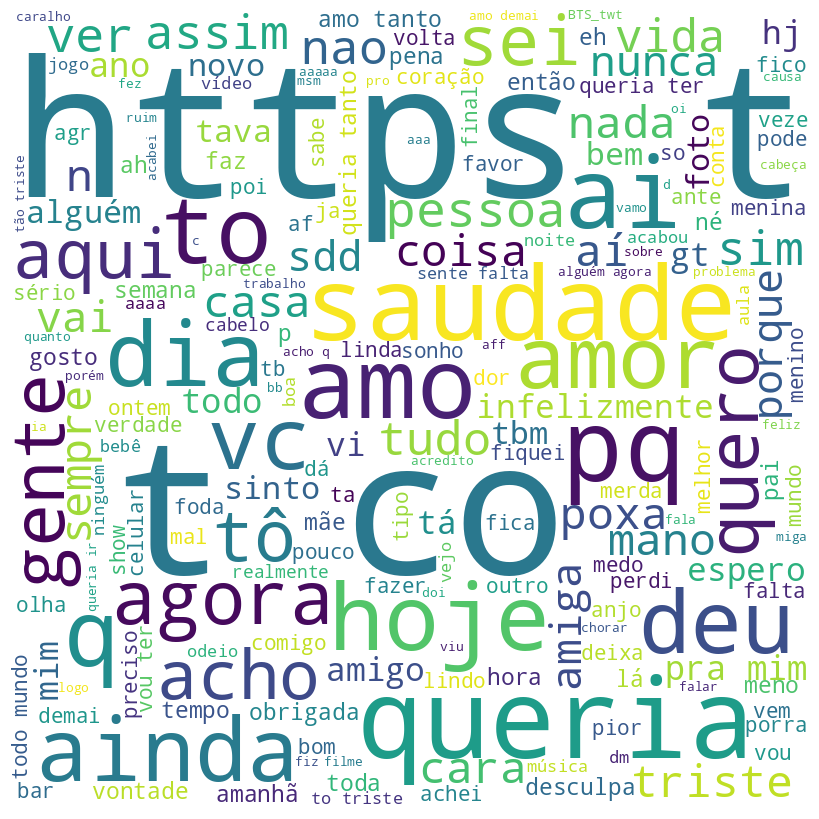

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
query = df.query("label == 'Negativo'")["text"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

### Using a nltk text

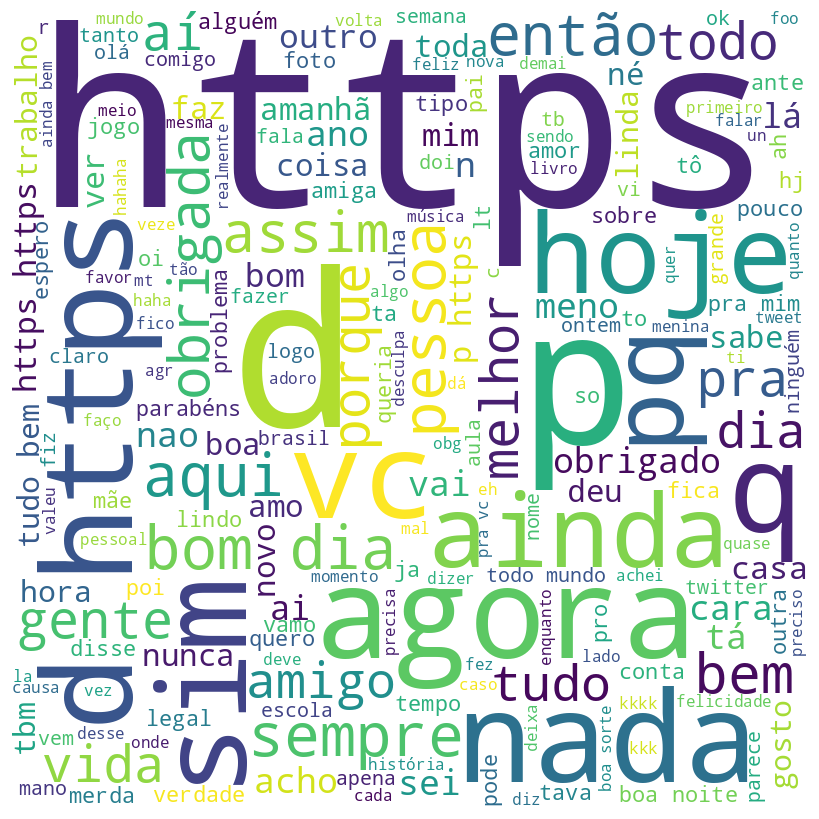

In [7]:
query = df.query("label == 'Positivo'")["text_nltk"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

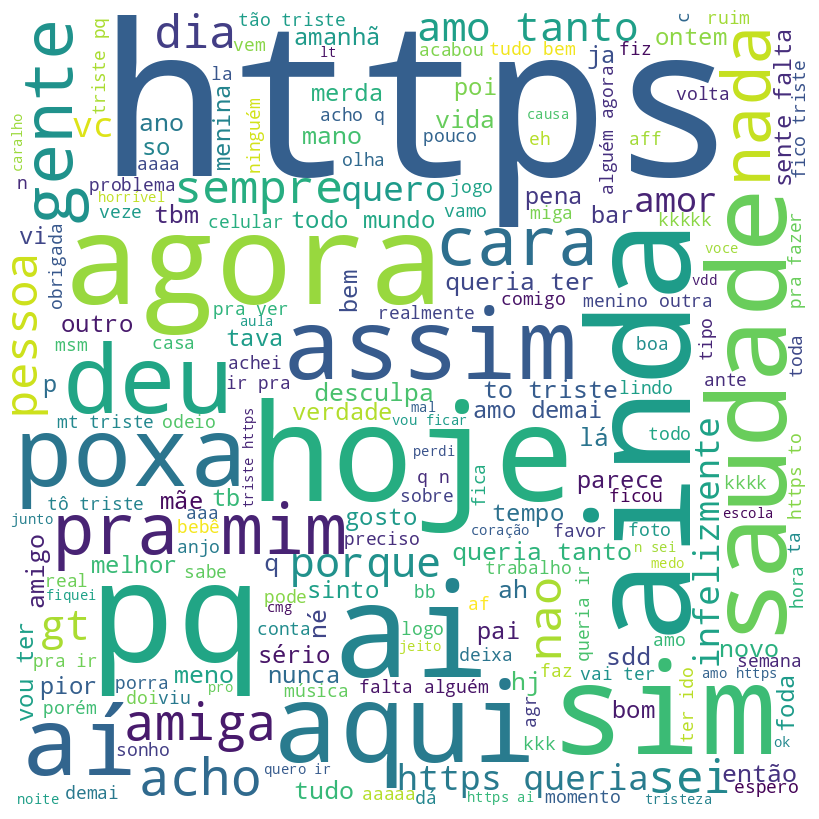

In [6]:
query = df.query("label == 'Negativo'")["text_nltk"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

### using a spacy text

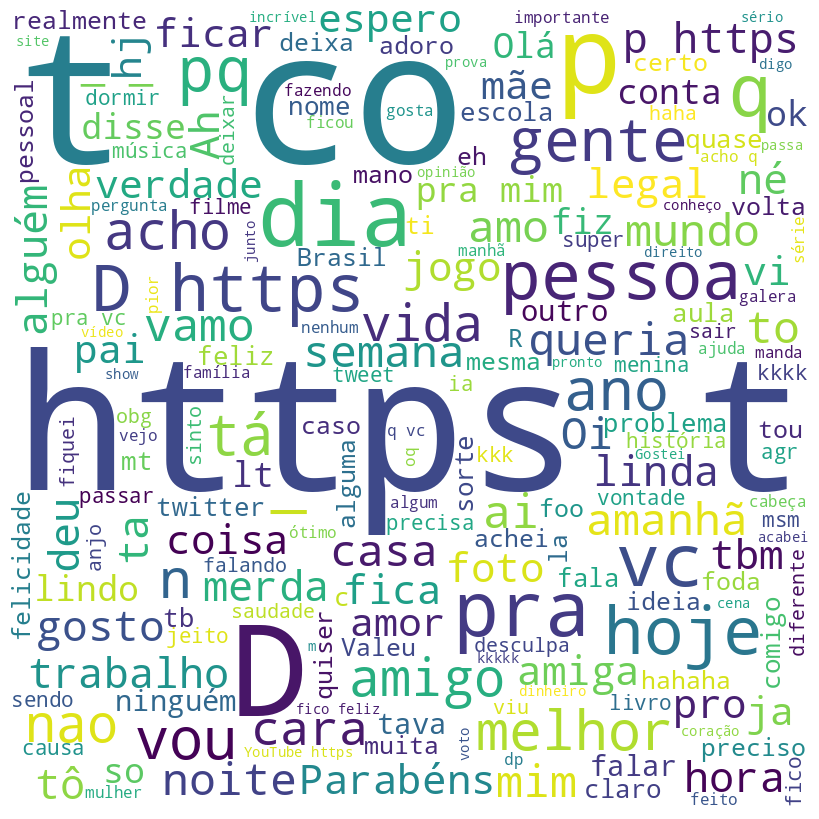

In [8]:
query = df.query("label == 'Positivo'")["text_spacy"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

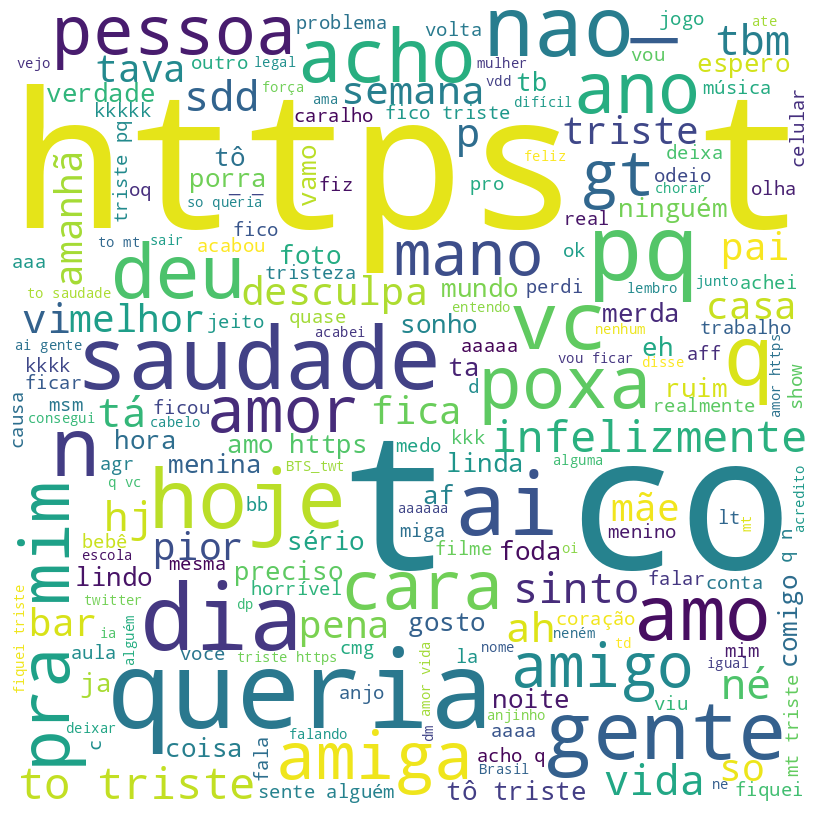

In [9]:
query = df.query("label == 'Negativo'")["text_spacy"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

### Using text from nltk and spacy

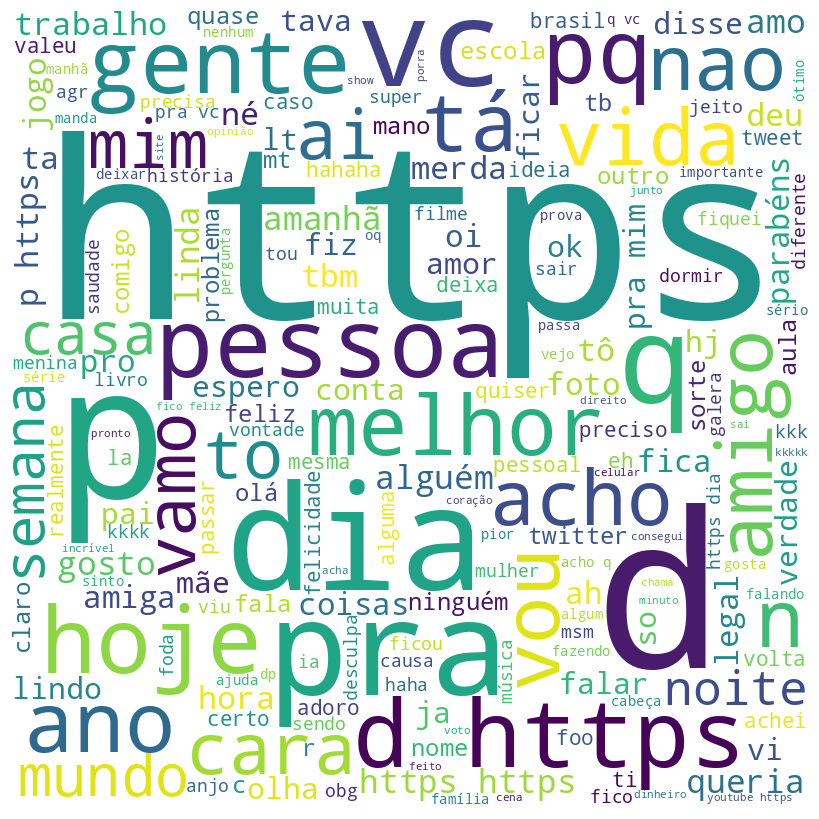

In [10]:
query = df.query("label == 'Positivo'")["text_spacy_nltk"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

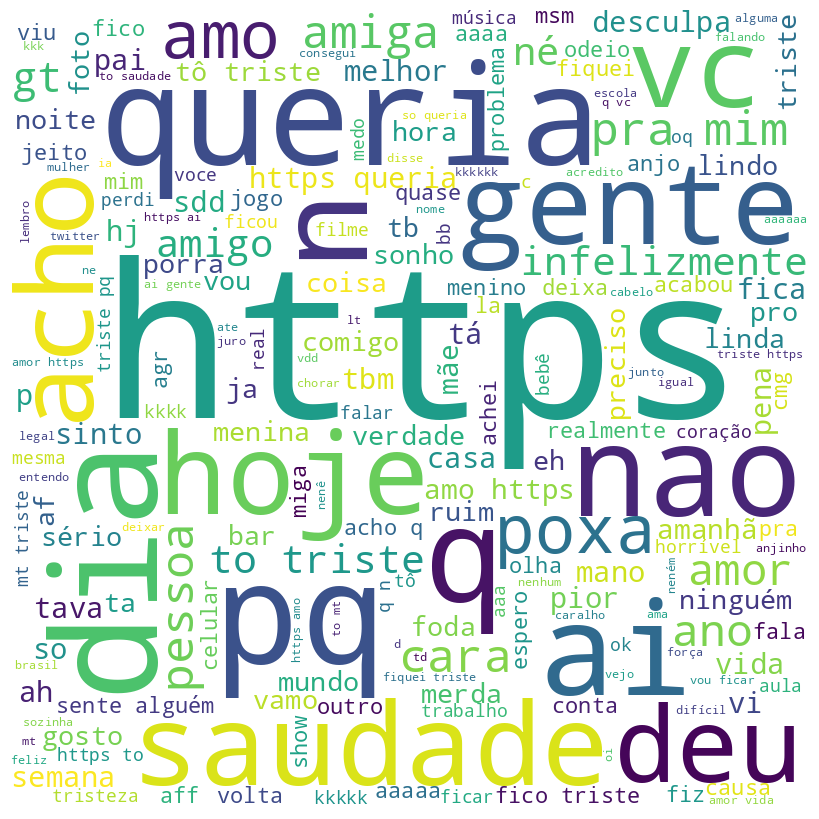

In [11]:
query = df.query("label == 'Negativo'")["text_spacy_nltk"].str.cat(sep=' ')
stopwords = nltk.corpus.stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('portuguese'), 
                min_font_size = 10).generate(query)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [12]:
df["label"].value_counts()

Negativo    522707
Positivo    263107
Name: label, dtype: int64

In [13]:
len = len(df["label"])
len

785814

In [15]:
neg_freq =  round(df["label"].value_counts()[0]/len * 100, 2)
neg_freq

66.52

In [17]:
pos_freq =  round(df["label"].value_counts()[1]/len * 100, 2)
pos_freq

33.48

In [16]:
Rótulo Quantidade Frequência
Negativo 522707 66.52
Positivo 263107 33.48

522723.4728